In [1]:
import numpy as np
import matplotlib.pylab as plot
import astropy.coordinates as coord
from astropy.time import Time,TimeDelta
from astropy.io import fits
import tao_planning_sims
import matplotlib.ticker as mtick

In [2]:
mjd=59581.
t=Time(mjd,format='mjd')
#ft2=tao_planning_sims.read_ft2(59581.)
ft2=fits.open('/Users/jracusin/BurstCube/orbit_sim/ft2/FT2_BC_TLE.fits')[1].data

In [3]:
ft2dir='/Users/jracusin/BurstCube/orbit_sim/ft2/'
mjd0=59580.
mjds=mjd0+365.
n='\n'
outfile='FT2_BC_TLE.fits'
file='BurstCube_gtorbsim.txt'
file=open(ft2dir+file,'w')
file.write('start_MJD = '+str(mjd0)+n)
file.write('stop_MJD = '+str(mjds)+n)
file.write('TLType = SINGLE'+n)
file.write('Timeline = |SURVEY|0.0|'+n)
file.write('EphemFunc = tlederive'+n)
file.write('EphemName = ISS.tle'+n)
file.write('Units = 1.0'+n)
file.write('Resolution = '+str(1.0)+n)
file.write('Initial_RA = 0'+n)
file.write('Initial_DEC = 0'+n)
file.write('saafile = TAO_SAA_2018.01'+n)
file.write('OutPutFile = '+ft2dir+outfile+n)
file.close()

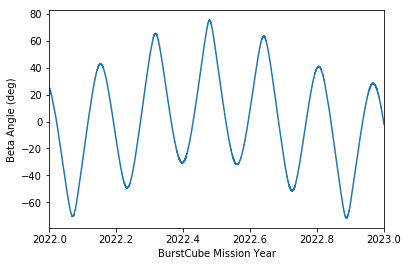

In [10]:
plot.figure()

#time=ft2['START']-Time('2001-01-01T0:00:00').gps
time=Time(ft2['START']+(Time('2001-01-01T0:00:00').gps-Time('1980-01-06T00:00:00').gps),format='gps')
sun=coord.get_sun(time)
sunra=sun.ra.value
sundec=sun.dec.value
sep=tao_planning_sims.separation(sunra,sundec,ft2['RA_NPOLE'],ft2['DEC_NPOLE'])
beta=90.-sep

plot.plot(time.decimalyear,beta)
plot.xlim([2022,2023])
plot.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
plot.ylabel('Beta Angle (deg)')
plot.xlabel('BurstCube Mission Year')
plot.show()

In [5]:
ft2.columns

ColDefs(
    name = 'START'; format = 'D'; unit = 's'
    name = 'STOP'; format = 'D'; unit = 's'
    name = 'SC_POSITION'; format = '3E'; unit = 'm'
    name = 'LAT_GEO'; format = 'E'; unit = 'deg'
    name = 'LON_GEO'; format = 'E'; unit = 'deg'
    name = 'RAD_GEO'; format = 'D'; unit = 'm'
    name = 'RA_ZENITH'; format = 'E'; unit = 'deg'
    name = 'DEC_ZENITH'; format = 'E'; unit = 'deg'
    name = 'B_MCILWAIN'; format = 'E'; unit = 'Gauss'
    name = 'L_MCILWAIN'; format = 'E'; unit = 'Earth_Radii'
    name = 'GEOMAG_LAT'; format = 'E'; unit = 'deg'
    name = 'IN_SAA'; format = 'L'
    name = 'RA_SCZ'; format = 'E'; unit = 'deg'
    name = 'DEC_SCZ'; format = 'E'; unit = 'deg'
    name = 'RA_SCX'; format = 'E'; unit = 'deg'
    name = 'DEC_SCX'; format = 'E'; unit = 'deg'
    name = 'RA_NPOLE'; format = 'E'; unit = 'deg'
    name = 'DEC_NPOLE'; format = 'E'; unit = 'deg'
    name = 'ROCK_ANGLE'; format = 'E'; unit = 'deg'
    name = 'LAT_MODE'; format = 'J'
    name = 'LAT_CON

In [6]:
saa=np.where(ft2['IN_SAA']==1)[0]

In [7]:
print float(len(saa))/len(ft2)

0.162998167812


In [24]:
#duration can be calculated by the equation:

r_eq=6378.14 #km (Earth radius)
r_sat=r_eq+408. #km (distance between earth center and the satellite)
R=np.arcsin(r_eq/r_sat)
Ts=2*R/360.*90.
# R=r_eq/r_sat
# Ts=(24/np.pi)*np.arccos(np.sqrt(1.-R**2))/np.sin(np.radians(beta))
print Ts

0.6111356502797248
